In [1]:
import psycopg2
import pandas.io.sql as sqlio
import pandas as pd
import numpy as np
import scipy.stats as st
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go

In [2]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#### Credit history to approval

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/selimcamlibel/downloads/data.csv") 
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

#### Univariate analysis

In [7]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:title={'center':'Percentage of Loans Approved'}>

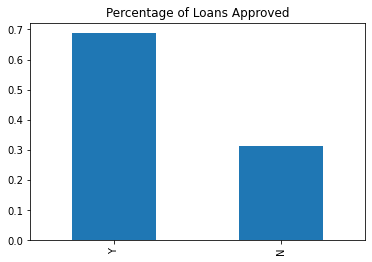

In [8]:
## normalised to get proportions
df.Loan_Status.value_counts(normalize = True).plot.bar(title='Percentage of Loans Approved')

<AxesSubplot:title={'center':'Approval of Loans'}>

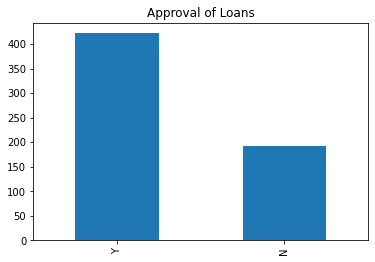

In [9]:
df.Loan_Status.value_counts().plot.bar(title='Approval of Loans')

#### Around 69% of loans got approved

#### Categorical univariate analysis

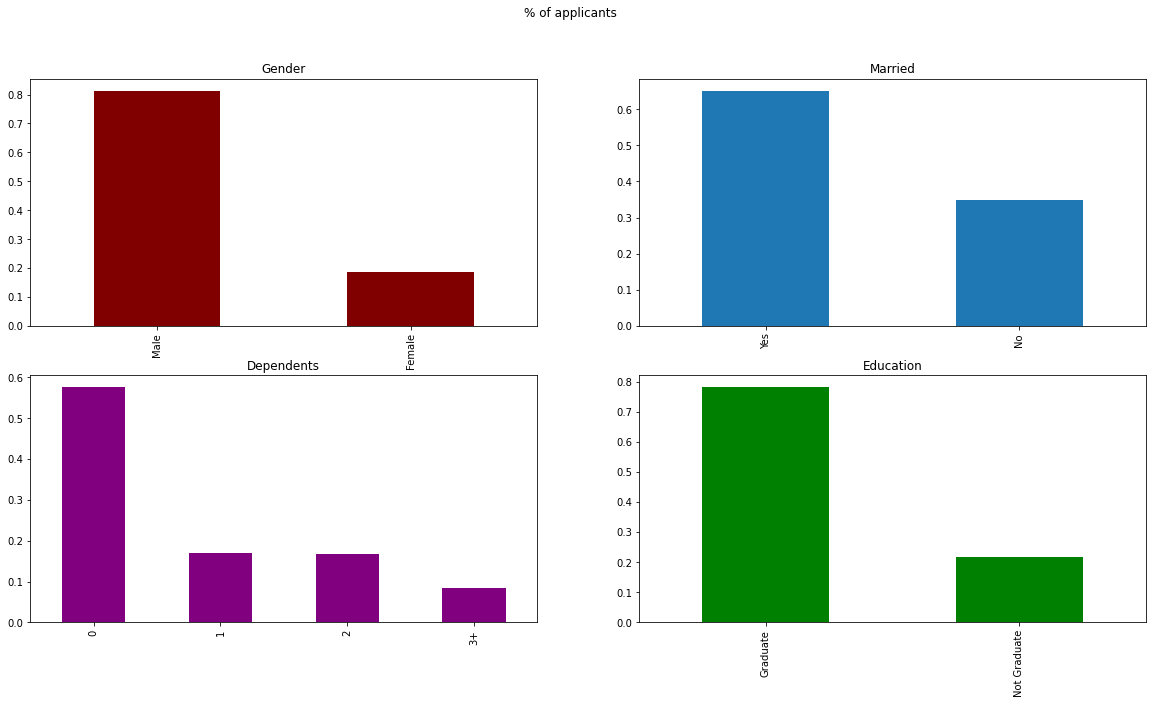

In [10]:
# Visualizing categorical features
plt.figure(1)
plt.suptitle('% of applicants')
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender', color = 'maroon')

plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
df['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents', color = 'purple')

plt.subplot(224)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education', color = 'green')

plt.show()

##### 80% of applicants were male
##### 65% of applicants were married
##### 58% of applicants had no dependants
##### 75% of applicants were educated

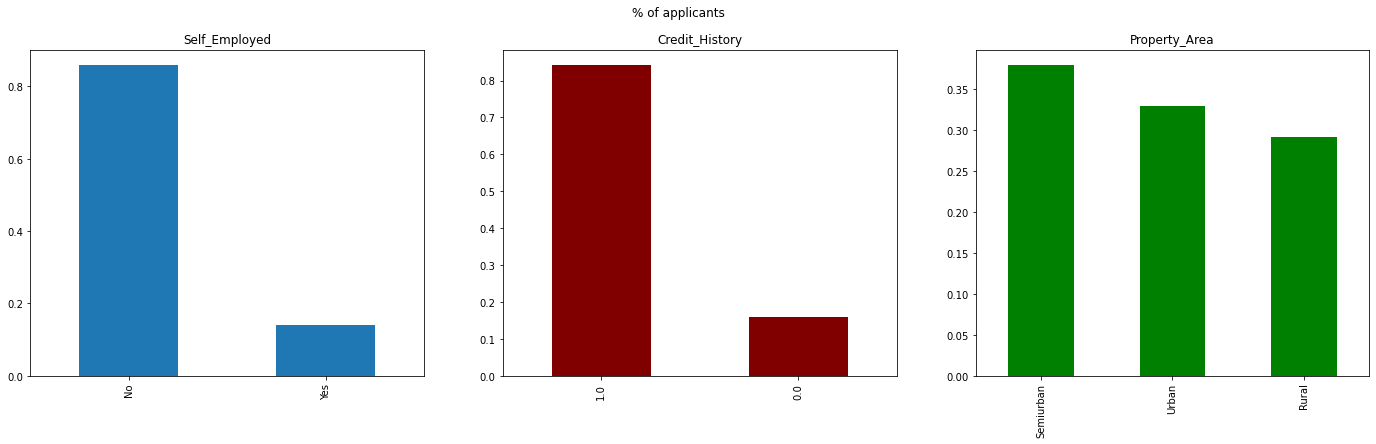

In [11]:
# Visualizing remaining categorical features
plt.figure(1)
plt.suptitle('% of applicants')
plt.subplot(131)
df['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed')

plt.subplot(132)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History', color = 'maroon')

plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', color = 'green')

plt.show()

##### 85% of applicants were self employed
##### 85% of applicants had a credit history

#### Univariate numerical features

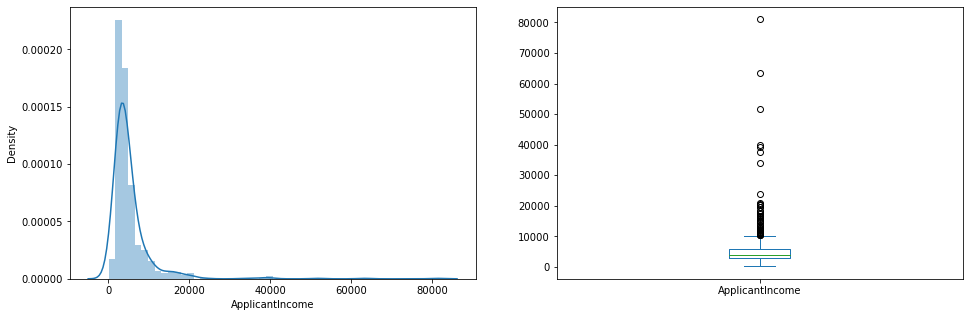

In [57]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [13]:
#### lots of outliers and right skewed

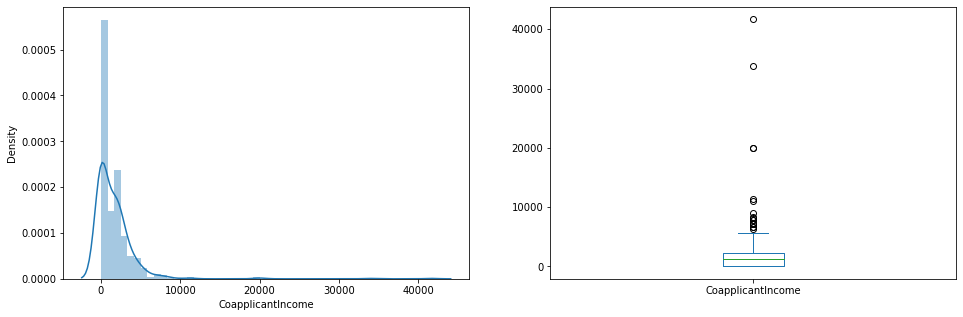

In [58]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [15]:
#### lots of outliers and right skewed

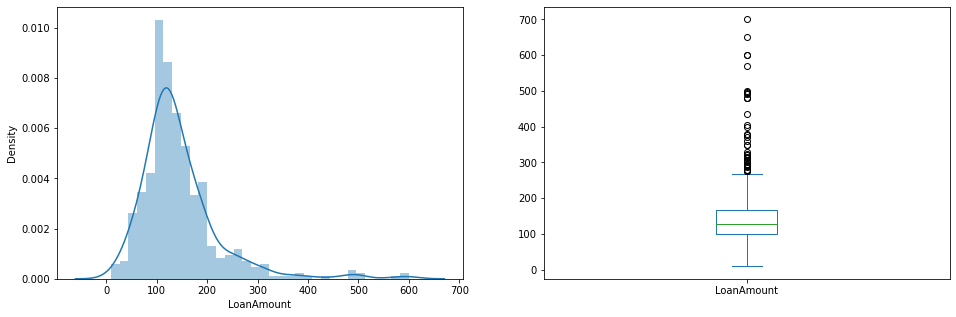

In [16]:
plt.figure(1)
plt.subplot(121)
df1=df.dropna()
sns.distplot(df1['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [17]:
#### more normally distributed than other two but still has lots of outliers

### Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


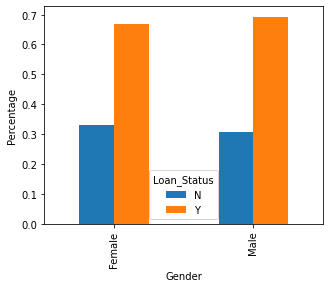

In [18]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))

Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(5,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

In [19]:
### Gender doesn't seem to affect loan approval rate by much with males just edging it over the females
### male - 68%
### female - 66%

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


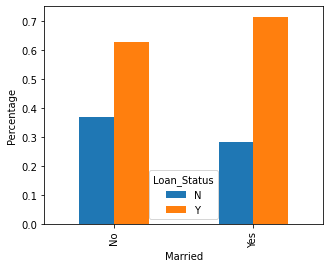

In [20]:
print(pd.crosstab(df['Married'],df['Loan_Status']))

Married=pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

In [21]:
#### married people tend to have higher approval and lower dissaproval rates:
#### married had 70% approval unmarried had 63% approval 

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


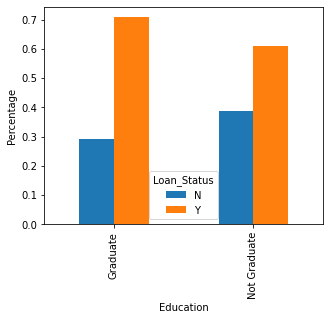

In [22]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

In [23]:
### graduates have better approval rates at 70% while non graduates have a rate of 60%

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


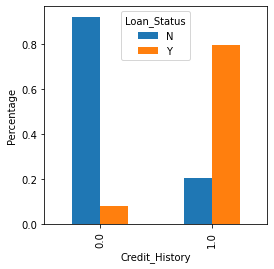

In [24]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

In [25]:
# as expected people with a credit history have a significantly higher loan approval percentage at 80% 
# while people without a credit history have a less than 10% approval rate

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(0, inplace=True)

In [28]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:>

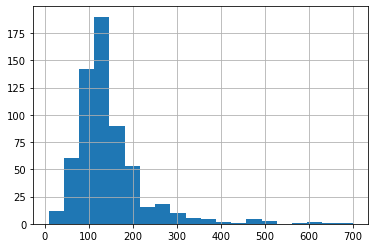

In [45]:
df['LoanAmount'].hist(bins=20, label= 'Loan Amount')

<AxesSubplot:>

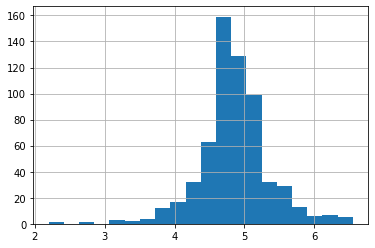

In [31]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Combine both incomes as total income and take a log transformation of the same.

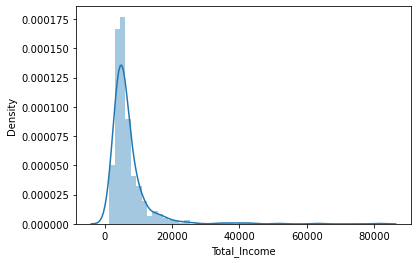

In [32]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
sns.distplot(df['Total_Income']);

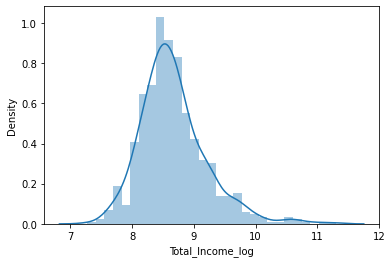

In [33]:
df['Total_Income_log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_log']);

In [34]:
# EMI feature
df['EMI']=(df['LoanAmount']/df['Loan_Amount_Term'])*1000

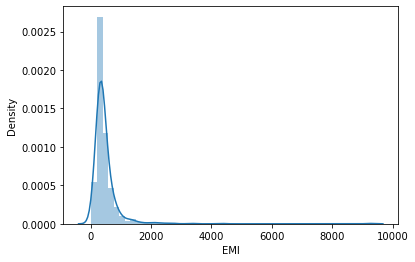

In [35]:
sns.distplot(df['EMI']);

In [36]:
# Balance Income feature
df['Balance Income']=df['Total_Income']-(df['EMI']) 

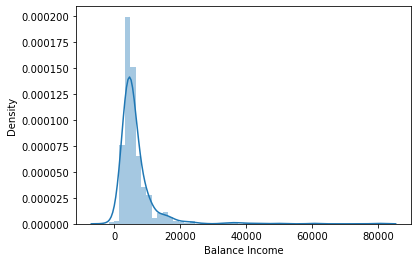

In [37]:
sns.distplot(df['Balance Income']);

## 4. Building a Predictive Model

In [38]:
#loan id don't have an effect on the outcome
df=df.drop('Loan_ID',axis=1)

In [39]:
"""Sklearn requires the target variable in a separate dataset.
so, we will drop our target variable from the train dataset and save it in another dataset."""

x = df.drop('Loan_Status',1)
y = df.Loan_Status                # Save target variable in separate dataset

In [40]:
#As logistic regression takes only the numerical values as input, we have to change every categorical variable to continious 

x=pd.get_dummies(x)
train=pd.get_dummies(df)
test=pd.get_dummies(df)

In [41]:
#we will use train_test_split function of sklearn to validate our predictions
from sklearn.model_selection import train_test_split

x_train,x_cv,y_train,y_cv = train_test_split(x,y, test_size=0.3, random_state=123)

#### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [46]:
pred_cv=LR.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.6702702702702703

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
pred_cv=RF.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.6972972972972973

In [51]:
from xgboost import XGBClassifier

In [52]:
XG= XGBClassifier()
XG.fit(x_train,y_train)

[16:29:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426411619/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
pred_cv=XG.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7027027027027027